# US Accidents Exploratory Data Analysis

1. Data Sourced from Kaggle.
2. It contents information related to accidents in US.
3. Used the sample data file which contains (500000)rows because original file is huge in size(2.8gb)


## Download Data

In [2]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

In [4]:
url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhanshuvaibhav
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 653M/653M [00:49<00:00, 13.9MB/s]


In [2]:
data_file = './us-accidents/US_Accidents_March23.csv'

## Data Preparation & Cleaning

1. Load the file using pandas.
2. Look at high level info about columns.
3. Fix any missing or incorrect values.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\shubh\OneDrive\Desktop\Python Projects\US_Accidents_March23.csv')

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [7]:
# numeric columns in data

numeric = ['int16','int32','int64','float16','float32','float64']

numeric_df = df.select_dtypes(include =numeric)
len(numeric_df.columns)

13

In [8]:
# Percentage of data contains null.

null_percentage = df.isnull().sum().sort_values(ascending = False) / len(df)
null_percentage

End_Lat                  0.440754
End_Lng                  0.440754
Precipitation(in)        0.285232
Wind_Chill(F)            0.258034
Wind_Speed(mph)          0.073974
Visibility(mi)           0.022582
Wind_Direction           0.022394
Humidity(%)              0.022260
Weather_Condition        0.022202
Temperature(F)           0.020932
Pressure(in)             0.017856
Weather_Timestamp        0.015348
Nautical_Twilight        0.002966
Civil_Twilight           0.002966
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit       

<AxesSubplot:>

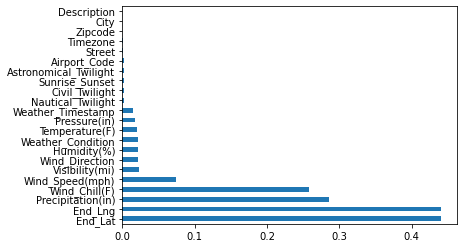

In [9]:
# percentage of missing values per column.

null_percentage[null_percentage != 0].plot(kind ='barh')

In [10]:
# dropped null columns.
null_percentage[null_percentage >= 0.2]

main_df = df.drop(['End_Lat','End_Lng','Precipitation(in)','Wind_Chill(F)'],axis = 1)
main_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,0.158,Stationary traffic on OR-47 from NW Martin Rd ...,Quince St,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,0.040,Incident on MILITARY TRL near WESTGATE AVE Dri...,N Military Trl,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,0.549,Crash on the right shoulder on E SR-69 Northbo...,E AZ-69,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,0.000,At US-340/S Stuart Ave - Serious accident.,W Spotswood Trl,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
# changed data type to datetime.

main_df['Start_Time'] = pd.to_datetime(main_df['Start_Time'])
main_df['End_Time'] = pd.to_datetime(main_df['End_Time'])
main_df['Weather_Timestamp'] = pd.to_datetime(main_df['Weather_Timestamp'])
main_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,0.158,Stationary traffic on OR-47 from NW Martin Rd ...,Quince St,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,0.040,Incident on MILITARY TRL near WESTGATE AVE Dri...,N Military Trl,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,0.549,Crash on the right shoulder on E SR-69 Northbo...,E AZ-69,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,0.000,At US-340/S Stuart Ave - Serious accident.,W Spotswood Trl,...,False,False,False,False,True,False,Day,Day,Day,Day


# EDA

In [12]:
main_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [13]:
main_df.City.unique

<bound method Series.unique of 0                 Zachary
1                Sterling
2                  Lompoc
3                  Austin
4             Bakersfield
               ...       
499995       Forest Grove
499996    West Palm Beach
499997              Dewey
499998             Elkton
499999        Chattanooga
Name: City, Length: 500000, dtype: object>

In [14]:
# total unique city.
uniq_city = main_df.City.unique()
len(uniq_city)

9489

In [15]:
accidents_by_cities = main_df.City.value_counts()
accidents_by_cities[:20]

Miami            12141
Houston          11031
Los Angeles      10299
Charlotte         8979
Dallas            8245
Orlando           6985
Austin            6269
Raleigh           5553
Nashville         4689
Baton Rouge       4625
Atlanta           4463
Sacramento        4358
San Diego         3581
Phoenix           3526
Minneapolis       3391
Richmond          3106
Oklahoma City     2932
Jacksonville      2689
Tucson            2614
Columbia          2530
Name: City, dtype: int64

In [16]:
import matplotlib.pyplot as plt

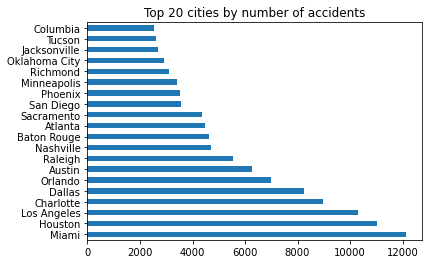

In [17]:
# Which are the top20 cities with highest number of accidents.

top_20_accidents_by_cities = accidents_by_cities[:20]
top_20_accidents_by_cities.plot(kind = 'barh')
plt.title('Top 20 cities by number of accidents')
plt.show()

In [63]:
accidents_by_cities[accidents_by_cities==1]

Bruneau          1
Hodgenville      1
Holloway         1
Townley          1
Olive            1
                ..
Newcomerstown    1
Lakehurst        1
New Concord      1
Smithmill        1
Fair Haven       1
Name: City, Length: 1904, dtype: int64

In [18]:
accidents_by_state = main_df.State.value_counts()
accidents_by_state.head(5)

CA    113274
FL     56710
TX     37355
SC     24737
NY     22594
Name: State, dtype: int64

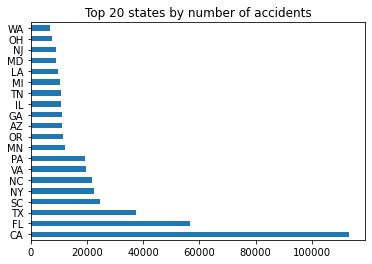

In [27]:
# top 20 states with highest number of accidents.

accidents_by_state[:20].plot(kind ='barh')
plt.title('Top 20 states by number of accidents')
plt.show()

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

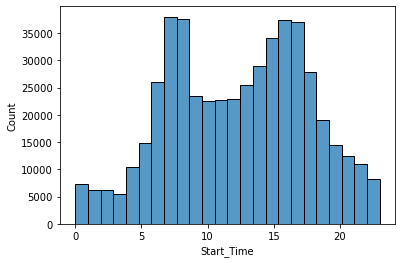

In [87]:
sns.histplot(main_df.Start_Time.dt.hour, bins = 24)

1. High number of accidents occur between 6am to 10am.--(maybe people are in hurry for work)
2. and then 3pm to 7pm

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

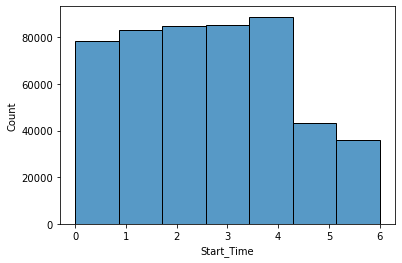

In [88]:
sns.histplot(main_df.Start_Time.dt.dayofweek, bins = 7)

Higher number of accidents on weekdays compared to weekends.


In [105]:
main_df['Day_of_Week'] = main_df.Start_Time.dt.dayofweek
wknd_df = main_df.loc[(main_df['Day_of_Week'] == 5) & (main_df['Day_of_Week'] == 6)]
wkday_df = main_df.loc[(main_df['Day_of_Week'] != 5) & (main_df['Day_of_Week'] != 6)]

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

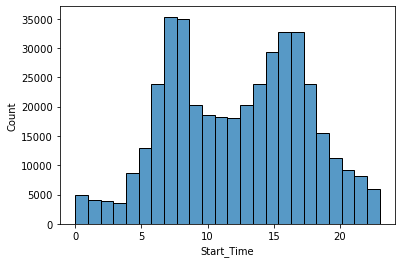

In [110]:
sns.histplot(wkday_df.Start_Time.dt.hour, bins = 24)

Peak hour between 6am to 10am and then 3pm to 7pm


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

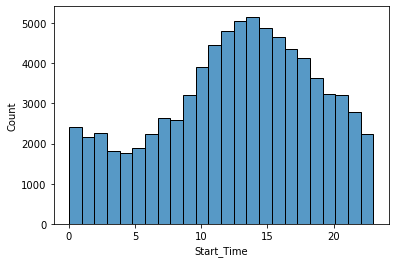

In [111]:
sns.histplot(wknd_df.Start_Time.dt.hour, bins = 24)

On weekends the peak hours is between 11am to 5pm unlike weekdays.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

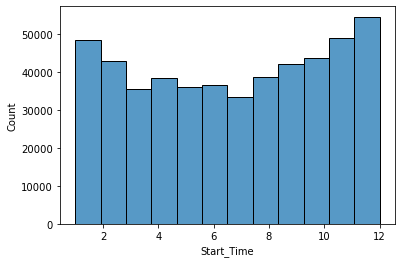

In [112]:
sns.histplot(main_df.Start_Time.dt.month, bins = 12)

High number of accidents in winter months.

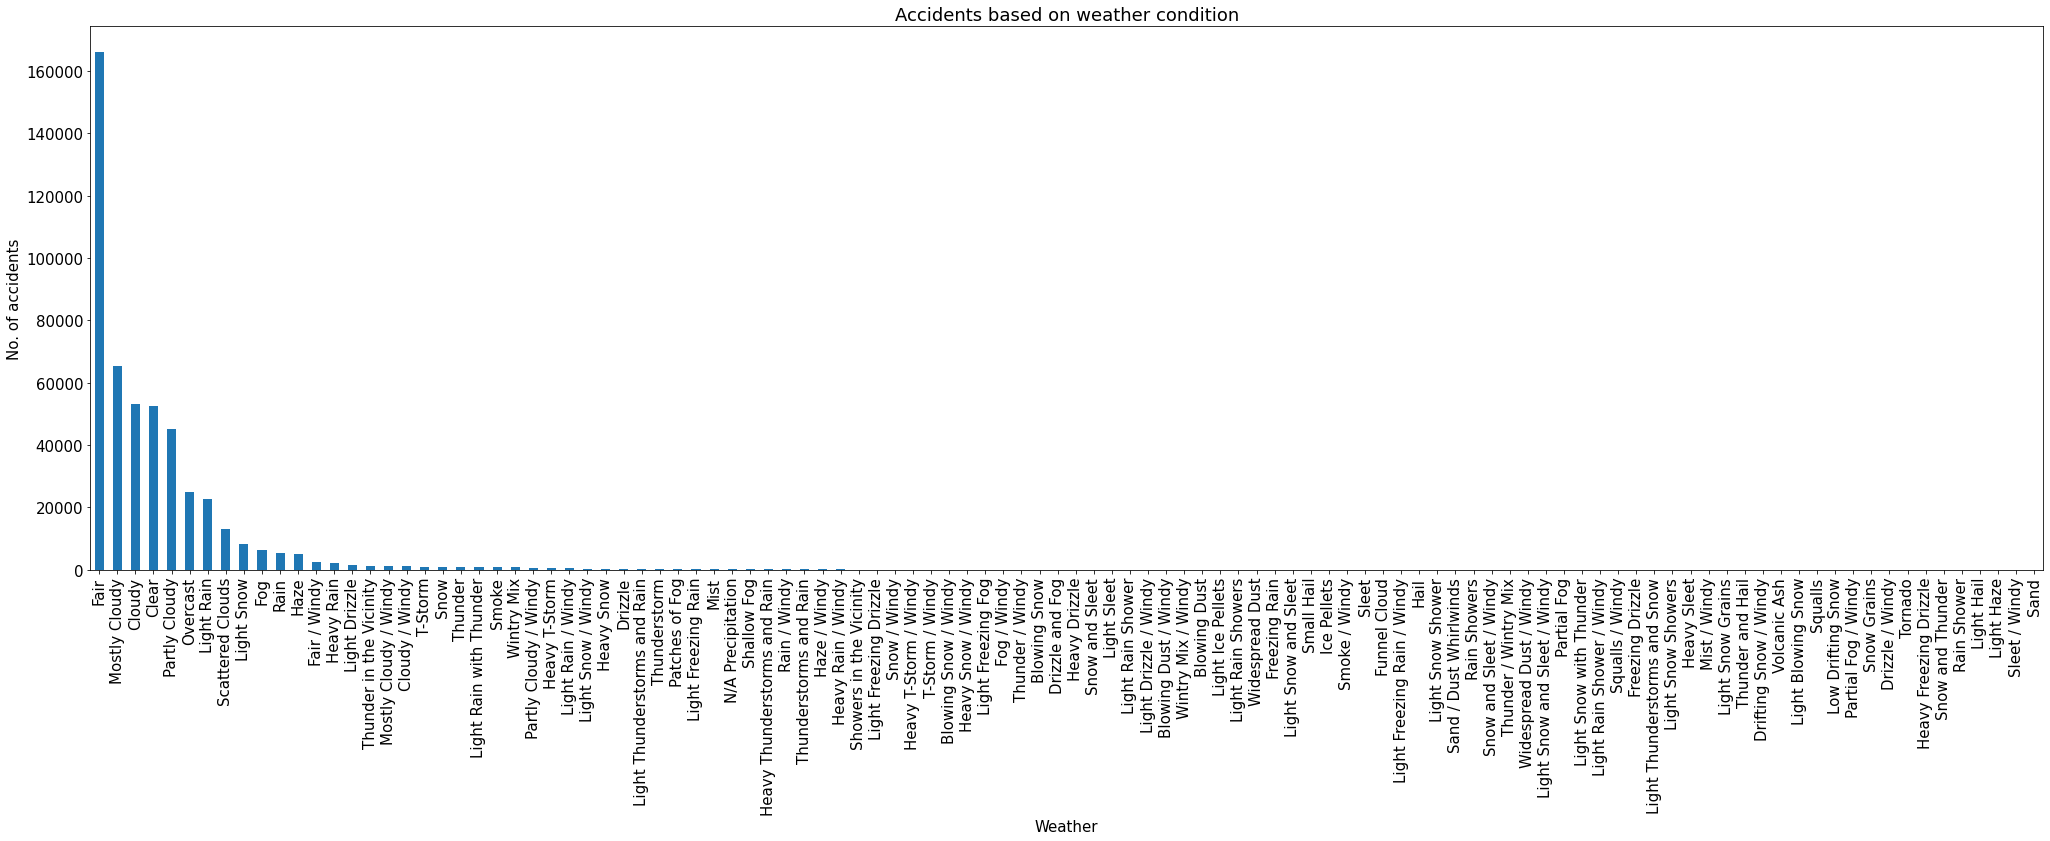

In [54]:
# Accidents due to weather?

plt.figure(figsize = (35,10))
main_df.Weather_Condition.value_counts().plot(kind = 'bar')
plt.title('Accidents based on weather condition')
plt.ylabel('No. of accidents')
plt.xlabel('Weather')
plt.rcParams.update({'font.size': 20})
plt.show()

Number of accidents is not related to weather.

## Conclusion & Insights

##### 1. Cities with highest number of accidents are (Los Angeles, Houston, Miami).
#### 2. On weekdays the peak hour is 6am to 10am and then 3pm to 7pm. (More people travelling at same time for work.)
    Can get more insights with accidents per unit of traffic if traffic data is available.
#### 3. On weekends the hour is normally distributed (between 11am to 5pm).
#### 4. Over 1900 cities just reported 1 accident (need to investigate).
#### 5. Number of accidents higher in winter months.
